In [18]:
import numpy as np
import carpet
import carpet.lattice.triangular as lattice
import carpet.visualize as vis
import time

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Change font globally - bigger for export
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
mpl.rc('font', size=16)

In [13]:
# Geometry
import carpet.lattice.triangular as lattice

nx = 6
ny = 6  # even number
N = nx * ny
a = 18  # [um] lattice spacing
connections = [a * np.array([np.cos(psi), np.sin(psi)])  # First neighbours
               for psi in np.linspace(0, 2 * np.pi, 6, endpoint=False)] 


L1,L2 = lattice.get_domain_sizes(nx,ny ,a)
coords, lattice_ids = lattice.get_nodes_and_ids(nx, ny, a)  # get cilia (nodes) coordinates
NN, TT = lattice.get_neighbours_list_general(coords, nx, ny, a, connections)
get_mtwist = lattice.define_get_mtwist(coords, nx, ny, a)
get_k = lattice.define_get_k_fbz(nx, ny, a)

m12s = [(m1,m2) for m1 in range(nx) for m2 in range(ny)]
mtwists = [get_mtwist(*m12) for m12 in m12s]

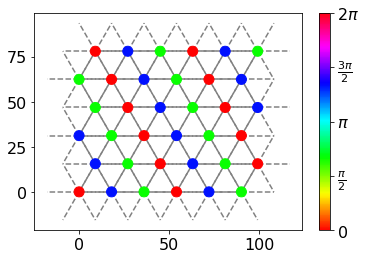

In [28]:
phi = get_mtwist(2, 1)  # sp.zeros([len(coords)])
vis.plot_edges(coords, TT, color='gray')
vis.plot_nodes(coords, phi=phi)
plt.show()

- Triangular lattice of phase oscillators (cilia model)
- oscillators are connected to all of the neareast neighbours

Let us define the coupling in the system:

In [15]:
import carpet.physics.kuramoto as physics

# Physics
period = 31.25            # [ms] period of cilia beat
freq = 2 * np.pi / period # [rad/ms] angular frequency
sin_str = 0.0016 * freq   # coupling strength

# Load frequencies
period = 2 * np.pi / freq
t_max = 2 * period # for the solver

coupling = physics.define_sine_coupling(sin_str)
right_side_of_ODE = physics.define_right_side_of_ODE(coupling, freq, NN, TT)
solve_cycle = carpet.define_solve_cycle(right_side_of_ODE, t_max, carpet.get_mean_phase)

Now let's solve a system, starting from a random phase vector.

Time spent: 3.46


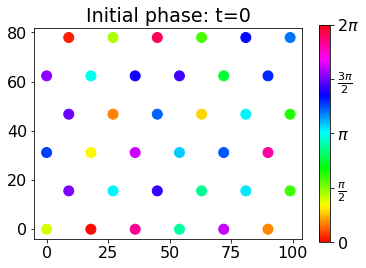

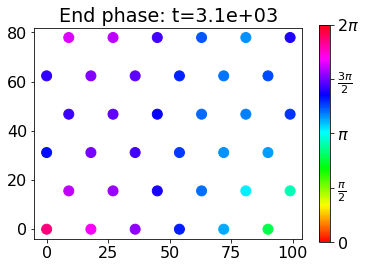

In [25]:
# Solve
np.random.seed(10)
phi0 = carpet.get_phase_random(N)  # initial condition
tol = 1e-6  # solver tolerance
ncycle = 100 # for how many cycles to solve

# Solve many cycles
phi = phi0
start = time.time() # clock time
t = 0 # time inside simulation
for icycle in range(ncycle):
    solution = solve_cycle(phi, tol)
    phi = solution.y.T[-1]
    phi = phi % (2  * np.pi)
    t += solution.t[-1]
end = time.time()

print(f"Time spent: {end - start:.3g}")

plt.title('Initial phase: t=0')
vis.plot_nodes(coords, phi=phi0)
plt.show()

plt.title(f'End phase: t={t:.2g}')
vis.plot_nodes(coords, phi=phi)
plt.show()

### Study waves

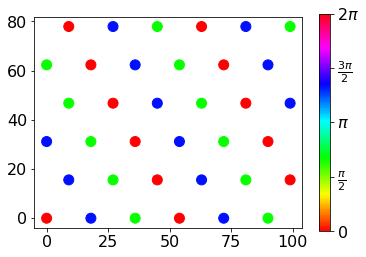

In [27]:
phi = get_mtwist(2,1) # == wave
vis.plot_nodes(coords, phi=phi)
plt.show()